In [14]:
import numpy as np
from numpy import genfromtxt
from scipy.ndimage import label

my_data = genfromtxt('Normal_distribution_data.csv', delimiter=',')

In [15]:
my_data

array([[15.37576206, 14.49387795, 15.60100563, 13.68114126, 15.26294666,
        14.89295532, 14.45368346, 14.8562769 , 14.64470077, 14.80562892],
       [15.32426756, 15.47016064, 15.60957284, 14.6469477 , 14.2092225 ,
        14.77708626, 14.0352846 , 15.26741318, 14.96390718, 14.82119312],
       [14.5099288 , 15.34477642, 14.13327986, 14.85027633, 14.31772646,
        15.30171903, 14.35060302, 14.17359394, 14.6565074 , 15.95253833],
       [15.06738992, 14.52879586, 15.65175204, 14.91954836, 15.62659806,
        14.90773313, 15.26854289, 14.32359673, 15.53301204, 16.0373849 ],
       [14.1614464 , 15.0696707 , 15.00082159, 15.36607137, 14.75254802,
        16.70486438, 15.73310176, 14.58186887, 14.37733952, 15.18267906],
       [14.87024815, 15.37081132, 14.34876136, 14.92070365, 14.59604788,
        15.63688293, 14.52732391, 14.9774331 , 14.87009629, 15.14682958],
       [15.29379566, 15.47754568, 15.33057969, 15.51671444, 14.55121444,
        15.13011805, 15.85524599, 15.40155015

In [16]:
ungrouped_data = my_data.flatten()
ungrouped_data

array([15.37576206, 14.49387795, 15.60100563, 13.68114126, 15.26294666,
       14.89295532, 14.45368346, 14.8562769 , 14.64470077, 14.80562892,
       15.32426756, 15.47016064, 15.60957284, 14.6469477 , 14.2092225 ,
       14.77708626, 14.0352846 , 15.26741318, 14.96390718, 14.82119312,
       14.5099288 , 15.34477642, 14.13327986, 14.85027633, 14.31772646,
       15.30171903, 14.35060302, 14.17359394, 14.6565074 , 15.95253833,
       15.06738992, 14.52879586, 15.65175204, 14.91954836, 15.62659806,
       14.90773313, 15.26854289, 14.32359673, 15.53301204, 16.0373849 ,
       14.1614464 , 15.0696707 , 15.00082159, 15.36607137, 14.75254802,
       16.70486438, 15.73310176, 14.58186887, 14.37733952, 15.18267906,
       14.87024815, 15.37081132, 14.34876136, 14.92070365, 14.59604788,
       15.63688293, 14.52732391, 14.9774331 , 14.87009629, 15.14682958,
       15.29379566, 15.47754568, 15.33057969, 15.51671444, 14.55121444,
       15.13011805, 15.85524599, 15.40155015, 13.58385198, 14.62

In [17]:
len(ungrouped_data)

200

In [18]:
grouped_data = []
for i in [1, 2, 4, 5, 10]:
    grouped_data.append(my_data.reshape(len(ungrouped_data)//i, i))
# grouped_data[0]


In [19]:
from  sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

avg_1 = np.average(grouped_data[0])
avg_2 = np.average(grouped_data[1], axis=1, keepdims=True)
avg_3 = np.average(grouped_data[2], axis=1, keepdims=True)
avg_4 = np.average(grouped_data[3], axis=1, keepdims=True)
avg_5 = np.average(grouped_data[4], axis=1, keepdims=True)

logstd_dev = []
logstd_dev.append(0)
logstd_dev.append(np.log(np.std(avg_2, ddof=1)))
logstd_dev.append(np.log(np.std(avg_3, ddof=1)))
logstd_dev.append(np.log(np.std(avg_4, ddof=1)))
logstd_dev.append(np.log(np.std(avg_5, ddof=1))) 
# 
# plt.plot(np.log([1, 2, 4, 5, 10]), log_std_dev)
# plt.show()

In [20]:
avg_2

array([[14.93482   ],
       [14.64107344],
       [15.07795099],
       [14.65498018],
       [14.72516485],
       [15.3972141 ],
       [15.12826027],
       [14.49315438],
       [14.65134889],
       [14.89255015],
       [14.92735261],
       [14.4917781 ],
       [14.80972274],
       [14.26209848],
       [15.30452286],
       [14.79809289],
       [15.2856502 ],
       [15.26716559],
       [14.79606981],
       [15.78519847],
       [14.61555855],
       [15.18344648],
       [15.7287062 ],
       [15.15748531],
       [14.78000929],
       [15.12052973],
       [14.6347325 ],
       [15.1164654 ],
       [14.7523785 ],
       [15.00846294],
       [15.38567067],
       [15.42364707],
       [14.84066625],
       [15.62839807],
       [14.10471217],
       [15.08520564],
       [14.8660778 ],
       [15.4134558 ],
       [14.16396559],
       [15.56834972],
       [14.29440204],
       [14.86251829],
       [16.00959805],
       [15.94341444],
       [14.46583185],
       [15

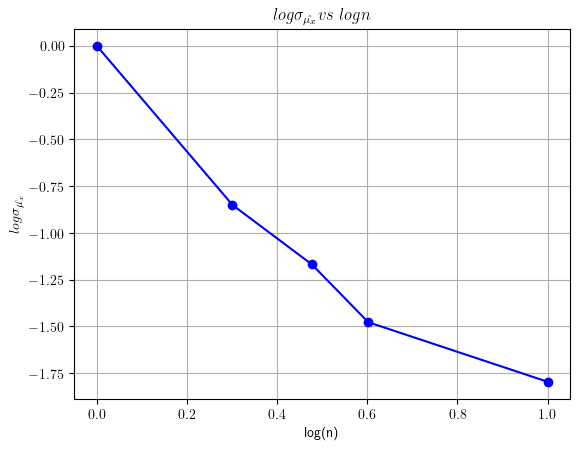

In [21]:
import matplotlib
# matplotlib.rc('font', family='Microsoft JhengHei')
plt.rcParams['text.usetex'] = True
plt.plot(np.log10([1, 2, 3, 4, 10]), logstd_dev, 'bo-')
plt.title(r' $ log\sigma_{\hat{\mu_x}} vs\ log{n}$')
plt.xlabel("log(n)")
plt.ylabel(r'$log\sigma_{\hat{\mu_x}}$')
plt.grid(True)
plt.savefig("1stpic.png")
plt.show()


In [22]:
np.log10([1, 2, 3, 4, 10])

array([0.        , 0.30103   , 0.47712125, 0.60205999, 1.        ])